In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
"""Generate data"""
true_slope = 10.889
true_intercept = 3.456
input_var = np.arange(0.0,100.0)
output_var = true_slope * input_var + true_intercept + 500.0 * np.random.rand(len(input_var))

<IPython.core.display.Javascript object>


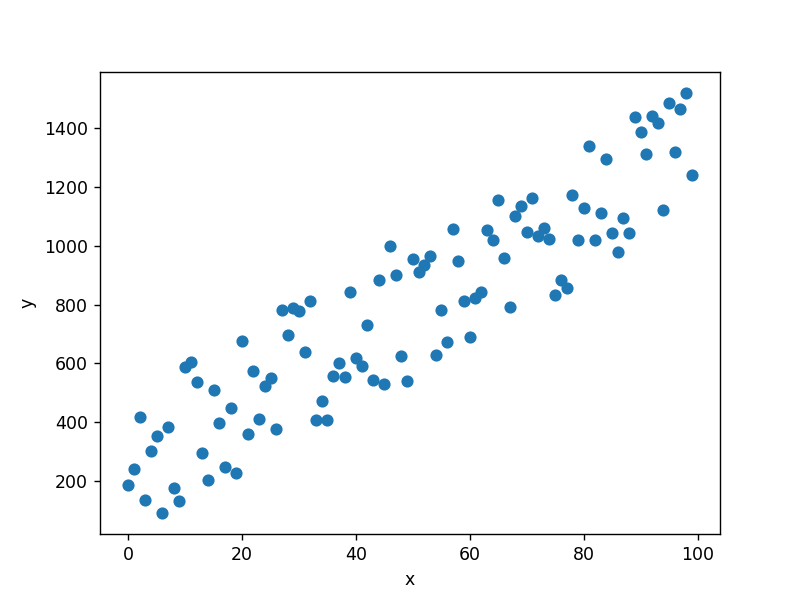

In [29]:
%matplotlib notebook
plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [30]:
def compute_cost(input_var, output_var, params):
    "Compute linear regression cost"
    num_samples = len(input_var)
    cost_sum = 0.0
    for x,y in zip(input_var, output_var):
        y_hat = np.dot(params, np.array([1.0, x]))
        cost_sum += (y_hat - y) ** 2
    
    cost = cost_sum / (num_samples * 2.0)
    
    return cost

In [31]:
def lin_reg_batch_gradient_descent(input_var, output_var, params, alpha, max_iter):
    """Compute the params for linear regression using batch gradient descent""" 
    iteration = 0
    num_samples = len(input_var)
    cost = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter])
    
    while iteration < max_iter:
        cost[iteration] = compute_cost(input_var, output_var, params)
        params_store[:, iteration] = params
        
        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        
        for x,y in zip(input_var, output_var):
            y_hat = np.dot(params, np.array([1.0, x]))
            gradient = np.array([1.0, x]) * (y - y_hat)
            params += alpha * gradient/num_samples
            
        iteration += 1
    
    return params, cost, params_store
    

In [32]:
"""Train the model"""
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.20)

params_0 = np.array([20.0, 80.0])

alpha_batch = 1e-3
max_iter = 500
params_hat_batch, cost_batch, params_store_batch =\
    lin_reg_batch_gradient_descent(x_train, y_train, params_0, alpha_batch, max_iter)

--------------------------
iteration: 0
cost: 7165852.019823685
--------------------------
iteration: 1
cost: 23356.927434357072
--------------------------
iteration: 2
cost: 16187.524062973145
--------------------------
iteration: 3
cost: 16180.780517575986
--------------------------
iteration: 4
cost: 16178.247783823206
--------------------------
iteration: 5
cost: 16175.622850054502
--------------------------
iteration: 6
cost: 16172.996072701735
--------------------------
iteration: 7
cost: 16170.370554622472
--------------------------
iteration: 8
cost: 16167.746394009435
--------------------------
iteration: 9
cost: 16165.12359330332
--------------------------
iteration: 10
cost: 16162.502151900979
--------------------------
iteration: 11
cost: 16159.882069102838
--------------------------
iteration: 12
cost: 16157.263344206669
--------------------------
iteration: 13
cost: 16154.645976510492
--------------------------
iteration: 14
cost: 16152.029965312624
----------------------

--------------------------
iteration: 154
cost: 15798.855211541557
--------------------------
iteration: 155
cost: 15796.423612345214
--------------------------
iteration: 156
cost: 15793.993273605714
--------------------------
iteration: 157
cost: 15791.56419467135
--------------------------
iteration: 158
cost: 15789.13637489081
--------------------------
iteration: 159
cost: 15786.709813613048
--------------------------
iteration: 160
cost: 15784.28451018743
--------------------------
iteration: 161
cost: 15781.860463963583
--------------------------
iteration: 162
cost: 15779.437674291534
--------------------------
iteration: 163
cost: 15777.016140521595
--------------------------
iteration: 164
cost: 15774.59586200444
--------------------------
iteration: 165
cost: 15772.176838091098
--------------------------
iteration: 166
cost: 15769.759068132873
--------------------------
iteration: 167
cost: 15767.342551481463
--------------------------
iteration: 168
cost: 15764.927287488894

--------------------------
iteration: 294
cost: 15470.408976108138
--------------------------
iteration: 295
cost: 15468.147647989277
--------------------------
iteration: 296
cost: 15465.887492289552
--------------------------
iteration: 297
cost: 15463.628508402744
--------------------------
iteration: 298
cost: 15461.370695722944
--------------------------
iteration: 299
cost: 15459.11405364456
--------------------------
iteration: 300
cost: 15456.858581562317
--------------------------
iteration: 301
cost: 15454.604278871226
--------------------------
iteration: 302
cost: 15452.35114496663
--------------------------
iteration: 303
cost: 15450.09917924419
--------------------------
iteration: 304
cost: 15447.848381099882
--------------------------
iteration: 305
cost: 15445.598749929966
--------------------------
iteration: 306
cost: 15443.350285131022
--------------------------
iteration: 307
cost: 15441.102986099988
--------------------------
iteration: 308
cost: 15438.85685223403

--------------------------
iteration: 457
cost: 15116.87112590182
--------------------------
iteration: 458
cost: 15114.793115454328
--------------------------
iteration: 459
cost: 15112.716182632666
--------------------------
iteration: 460
cost: 15110.64032687957
--------------------------
iteration: 461
cost: 15108.565547638069
--------------------------
iteration: 462
cost: 15106.491844351467
--------------------------
iteration: 463
cost: 15104.419216463346
--------------------------
iteration: 464
cost: 15102.347663417575
--------------------------
iteration: 465
cost: 15100.277184658338
--------------------------
iteration: 466
cost: 15098.207779630067
--------------------------
iteration: 467
cost: 15096.139447777528
--------------------------
iteration: 468
cost: 15094.072188545731
--------------------------
iteration: 469
cost: 15092.00600137999
--------------------------
iteration: 470
cost: 15089.940885725915
--------------------------
iteration: 471
cost: 15087.87684102937

In [33]:
def lin_reg_stoch_gradient_descent(input_var, output_var, params, alpha):
    """Compute the params for linear regression using stochastic gradient descent"""
    num_samples = len(input_var)
    cost = np.zeros(num_samples)
    params_store = np.zeros([2, num_samples])
    
    i = 0
    for x,y in zip(input_var, output_var):
        cost[i] = compute_cost(input_var, output_var, params)
        params_store[:, i] = params
        
        print('--------------------------')
        print(f'iteration: {i}')
        print(f'cost: {cost[i]}')
        
        y_hat = np.dot(params, np.array([1.0, x]))
        gradient = np.array([1.0, x]) * (y - y_hat)
        params += alpha * gradient/num_samples
        
        i += 1
            
    return params, cost, params_store

In [34]:
alpha = 1e-3
params_0 = np.array([20.0, 80.0])
params_hat, cost, params_store =\
lin_reg_stoch_gradient_descent(x_train, y_train, params_0, alpha)

--------------------------
iteration: 0
cost: 7165852.019823685
--------------------------
iteration: 1
cost: 7150996.813280608
--------------------------
iteration: 2
cost: 5785429.078458648
--------------------------
iteration: 3
cost: 5494527.33709369
--------------------------
iteration: 4
cost: 5265115.836733391
--------------------------
iteration: 5
cost: 5193340.620678144
--------------------------
iteration: 6
cost: 5155444.769434553
--------------------------
iteration: 7
cost: 4885054.746866873
--------------------------
iteration: 8
cost: 4883228.270497635
--------------------------
iteration: 9
cost: 4352302.713833211
--------------------------
iteration: 10
cost: 4166273.851399922
--------------------------
iteration: 11
cost: 3390530.0987332514
--------------------------
iteration: 12
cost: 3387334.910830567
--------------------------
iteration: 13
cost: 3070437.2057957263
--------------------------
iteration: 14
cost: 2973417.3611547733
--------------------------
iterat

<IPython.core.display.Javascript object>


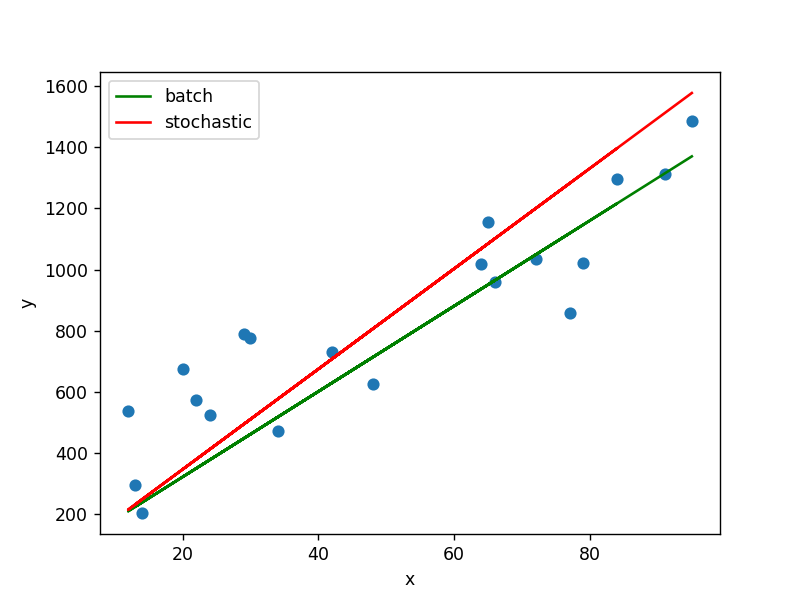

batch      T0, T1: 43.04408007075441, 13.964065617434857
stochastic T0, T1: 19.041549120929123, 16.39573193621663
batch rms:      186.8988507788576
stochastic rms: 206.18961975136835


In [35]:
plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, params_hat_batch[0] + params_hat_batch[1]*x_test, 'g', label='batch')
plt.plot(x_test, params_hat[0] + params_hat[1]*x_test, '-r', label='stochastic')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(f'batch      T0, T1: {params_hat_batch[0]}, {params_hat_batch[1]}')
print(f'stochastic T0, T1: {params_hat[0]}, {params_hat[1]}')
rms_batch = np.sqrt(np.mean(np.square(params_hat_batch[0] + params_hat_batch[1]*x_test - y_test)))
rms_stochastic = np.sqrt(np.mean(np.square(params_hat[0] + params_hat[1]*x_test - y_test)))
print(f'batch rms:      {rms_batch}')
print(f'stochastic rms: {rms_stochastic}')

<IPython.core.display.Javascript object>


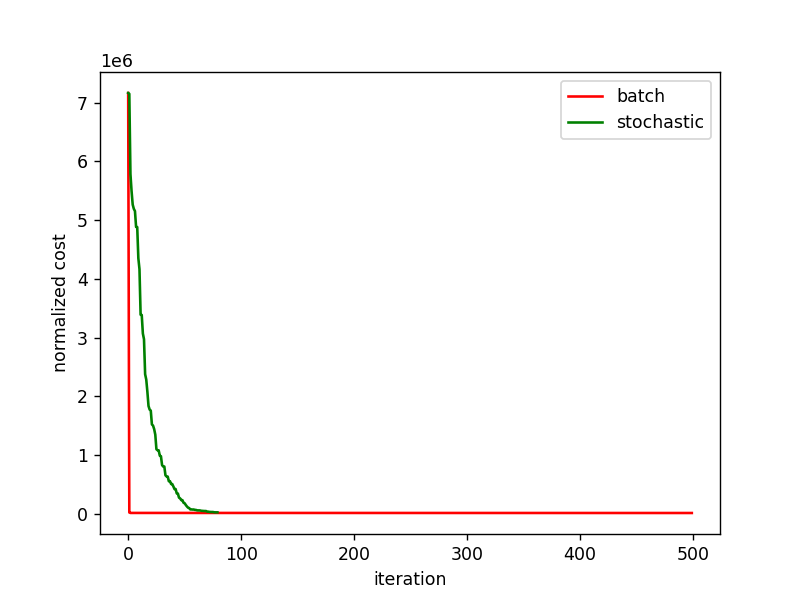

min cost with BGD: 15030.516157563348
min cost with SGD: 26153.81047799088


In [36]:
plt.figure()
plt.plot(np.arange(max_iter), cost_batch, 'r', label='batch')
plt.plot(np.arange(len(cost)), cost, 'g', label='stochastic')
plt.xlabel('iteration')
plt.ylabel('normalized cost')
plt.legend()
plt.show()
print(f'min cost with BGD: {np.min(cost_batch)}')
print(f'min cost with SGD: {np.min(cost)}')